<div style="display:block;
            border: 1.1px outset orange;
            border-radius: 10px 10px 10px;
            #background-color:#cw;">
     
<h1 style="color:Brown;
          font-size:30px;
          font-family:sans-serif;
          letter-spacing:0.9px;
          text-align:center"> TABLE OF CONTENTS</h1>
</div>

<a id="toc"></a>
- [1. Importing Libraries and Dataset](#1)
- [2. Features and Label Description ](#2)
- [3. Data Cleaning and Data Exploration](#3)
- [4. EDA Using Visualization](#4)
- [5. Feature Engineering and Feature Transformation](#5)
- [6. Correlation Matrix](#6)
- [7. Hyperparamter Tuning and Resolving Imbalance](#7)
    - [7.1 Model Building Approach using Random Hyperparamters without sampling](#7.1)
    - [7.2 Applying SMOTE](#7.2)
    - [7.3 HPT using Kerastuner after sampling](#7.3)
- [8. Final Model Building](#8)
- [9. Results Analyzation using ROC Curves](#9)

<a id="1"></a>

# Importing Libraries and Dataset

In [116]:
import pandas as pd
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from kerastuner.tuners import RandomSearch
import keras_tuner as kt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [117]:
data = pd.read_csv(r'C:\Users\trash\Downloads\Kaggle Datasets\Bank Customer Churn\Churn_Modelling.csv')

In [118]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<center><a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a></center>

<a id="2"></a>

# Features and Label Description

* RowNumber -- Unique Identifier for each record in the data.
* CustomerId -- Unique ID given to each customer.
* Surname  --  Its the Surname of customer.
* CreditScore -- Credit Score of the customers which ranges between 350 and 850 on scale of 0 to 1000.
* Geography -- Country to which the customers belongs.
* Gender -- Gender of customer.
* Age -- Age of customer.
* Tenure -- Number of years the customer has been a part of the Bank.
* Balance -- The balance amount that is remaining in customer's bank account.
* NumOfProducts -- Number of products the customers has bought from bank i.e like policy, loan etc.
* HasCrCard -- This tells whether the customer has Credit Card of the bank or not represented in form of binary data.
* IsActiveMember -- Is the customer an active member of bank or not represented in form of binary data.
* ExtimatedSalary --  Estimated Salary of the customer.
*
*
* Exited [LABEL]  -- This is the final prediction label that tells whether the customer has exited the bank i.e closed the bank account in their bank or not in form of binary data form.

In [119]:
for columns in data:
    print(f'{columns} : {data[columns].unique()}')

RowNumber : [    1     2     3 ...  9998  9999 10000]
CustomerId : [15634602 15647311 15619304 ... 15584532 15682355 15628319]
Surname : ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 7

<center><a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a></center> 

<a id="3"></a>

# Data Cleaning and Data Exploration

In [120]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [121]:
data[data.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [122]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#### Observations
1. It is clear from EDA that 'RowNumber', 'CustomerId' and 'Surname' are not useful predictors for the future model as they are all unique and we need to remove those and further go forward with EDA on other predictors.
2. After that we have to perform Visal EDA to get more insights from data.

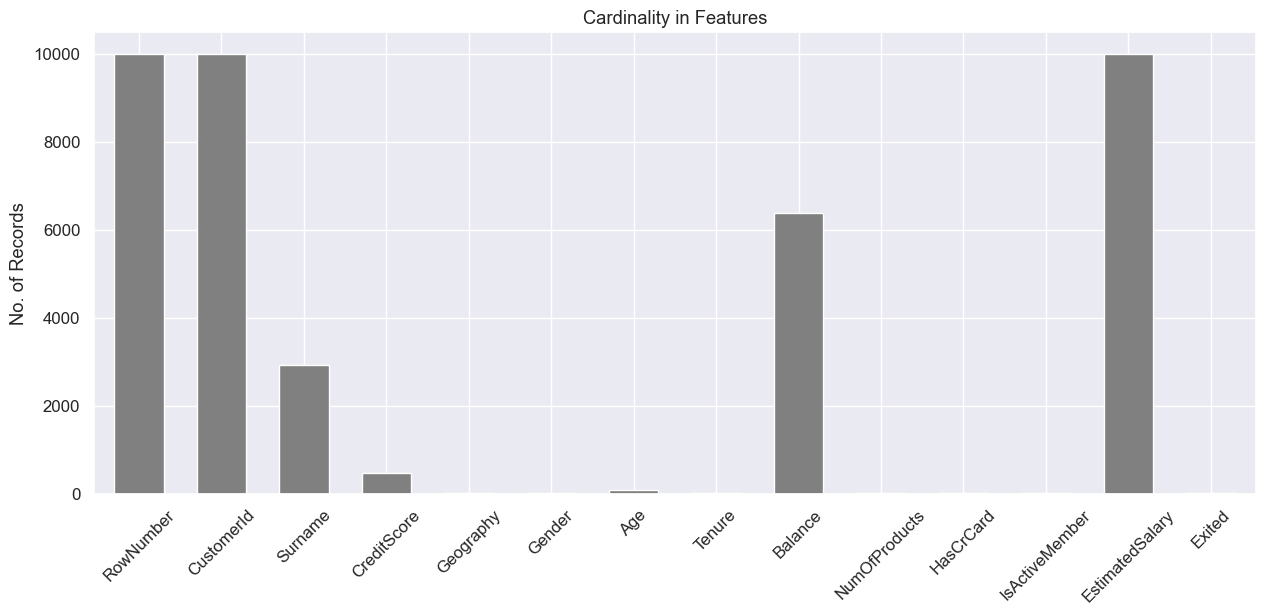

In [124]:
fig = plt.figure(figsize = (15, 6))
data.nunique().plot.bar(title="Cardinality in Features",width = 0.6,color = 'grey')
plt.xticks(rotation = 45)
plt.ylabel("No. of Records")
plt.show()

Geography
France     Axes(0.125,0.11;0.775x0.77)
Germany    Axes(0.125,0.11;0.775x0.77)
Spain      Axes(0.125,0.11;0.775x0.77)
Name: Age, dtype: object

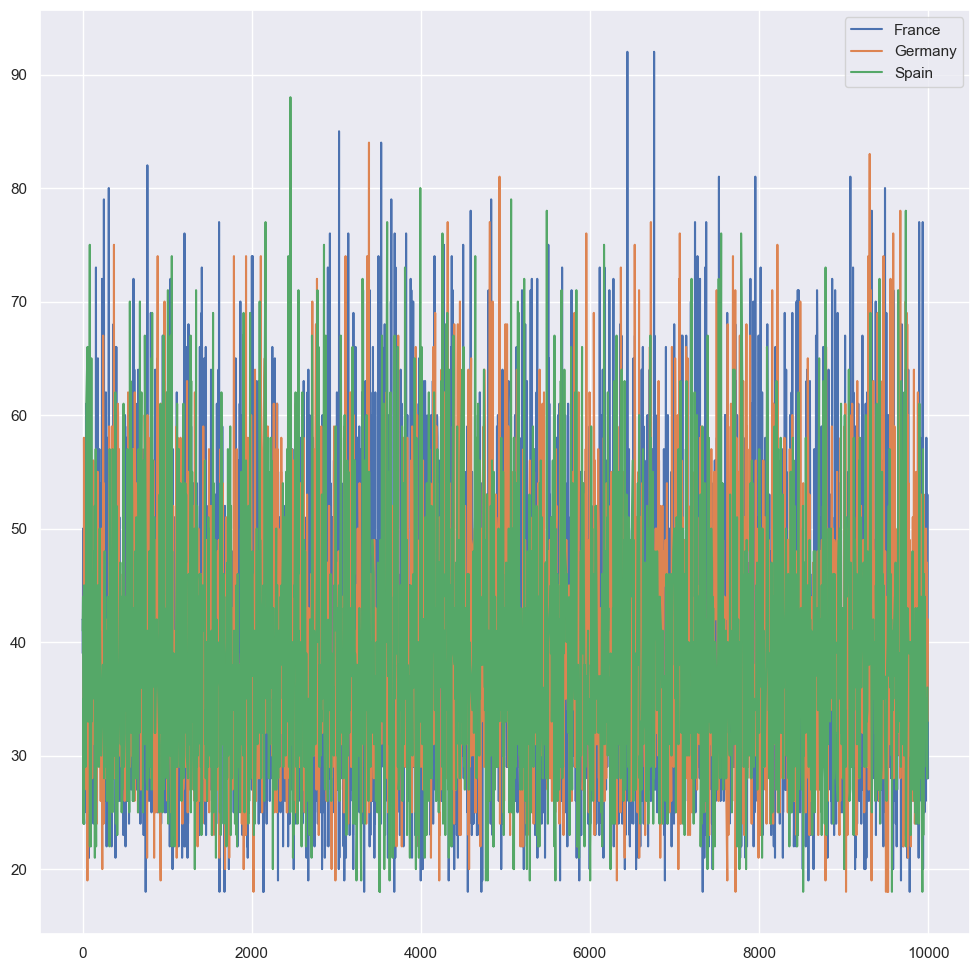

In [165]:
data.groupby('Geography')['Age'].plot(legend = True, figsize = (12,12))

Gender
Female    Axes(0.125,0.11;0.775x0.77)
Male      Axes(0.125,0.11;0.775x0.77)
Name: Age, dtype: object

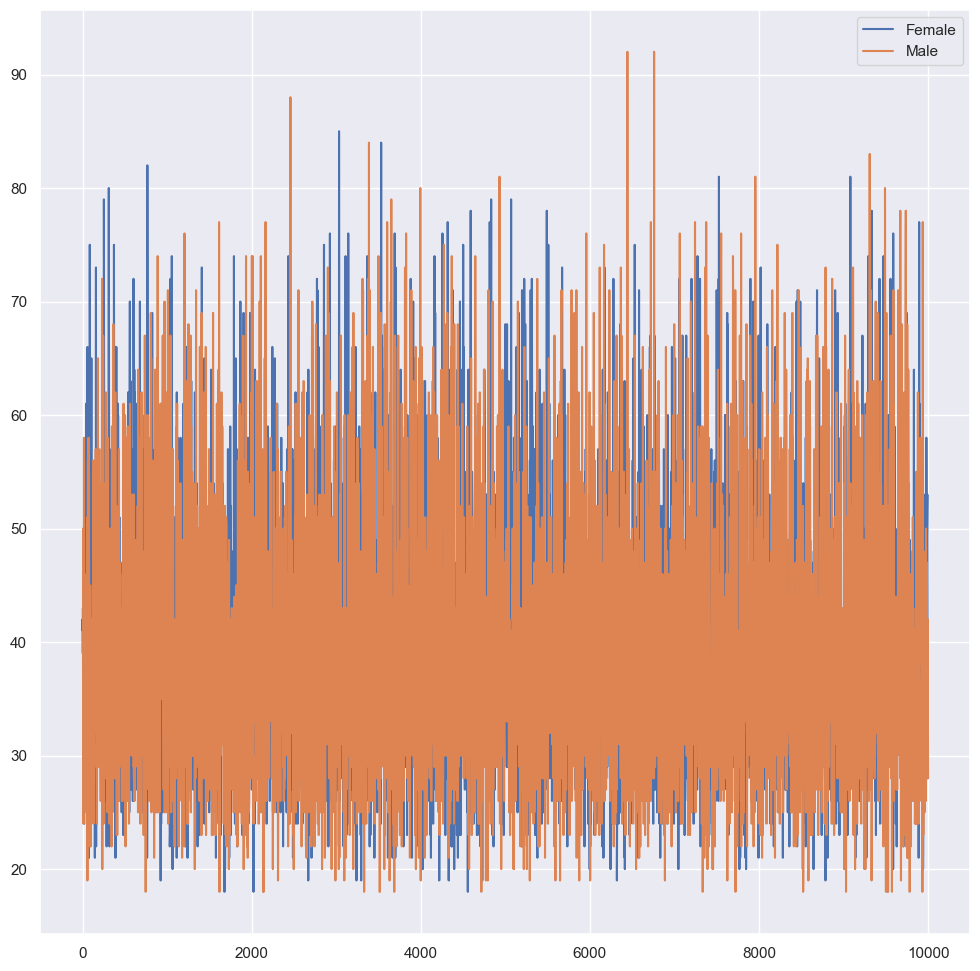

In [171]:
data.groupby('Gender')['Age'].plot(legend = True, figsize = (12,12))

In [9]:
data = data.drop(['RowNumber','CustomerId','Surname'],axis = 1)

In [10]:
for columns in data:
    print(f'{columns} : {data[columns].unique()}')

CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 

In [11]:
data['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

#### Observations
1. 'Tenure' of the customers are almost finely distributed between 11 years with each year denoted as a category.
2. We removed 'RowNumber', 'CustomerId' and 'Surname' predictors from dataset.
3. Eldest customers are from 'France' Country and are Males.

<center><a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a></center> 

<a id="4"></a>

# EDA Using Visualization

### 'CreditScore' and 'EstimatedSalary'

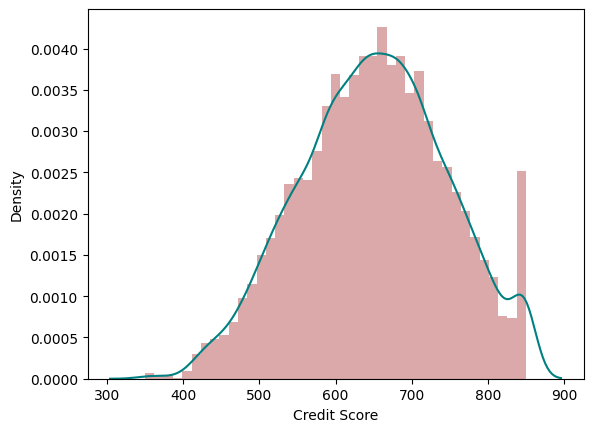

In [12]:
sns.distplot(x=data['CreditScore'],kde=True,kde_kws={'color':'teal'},color='brown')
plt.xlabel('Credit Score')
plt.show()

In [145]:
data['CreditScore'].min()

350

#### Observations
1. 'CreditScore' follows a Gaussian Curve and most of the data points lie at the middle of the peak i.e between 620 to 720 Credit_Score.
2. Few Exceptions peak at the maximum Credit Score i.e 850 so we look further into it.
3. 'CreditScore' lies between 350 and 850 with each end point included inside it.

<Axes: ylabel='CreditScore'>

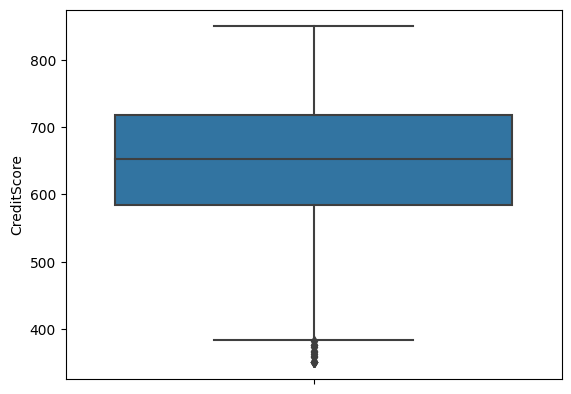

In [13]:
sns.boxplot(y = data['CreditScore'])

In [14]:
first_percentile_q1 = data['EstimatedSalary'].quantile(0.25)
third_percentile_q3 = data['EstimatedSalary'].quantile(0.75)
iqr = third_percentile_q3 - first_percentile_q1

min_threshold_weight = first_percentile_q1 - 1.5 * iqr
max_threshold_weight = third_percentile_q3 + 1.5 * iqr

outliers = data[(data['EstimatedSalary']<min_threshold_weight)|(data['EstimatedSalary']>max_threshold_weight)]
outliers

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [15]:
data1 = (data['EstimatedSalary'] - data['EstimatedSalary'].mean())/data['EstimatedSalary'].std()

In [16]:
data[(data1>3) | (data1<-3)]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


#### Observations
1. It is clear that 'CreditScore' or 'EstimatedPrice' do not contain any Outliers and all extreme observations are real life scenarios.
2. We then observe next predictors.

<center><a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a></center>  

### 'Age', 'Balance'  and 'Tenure'

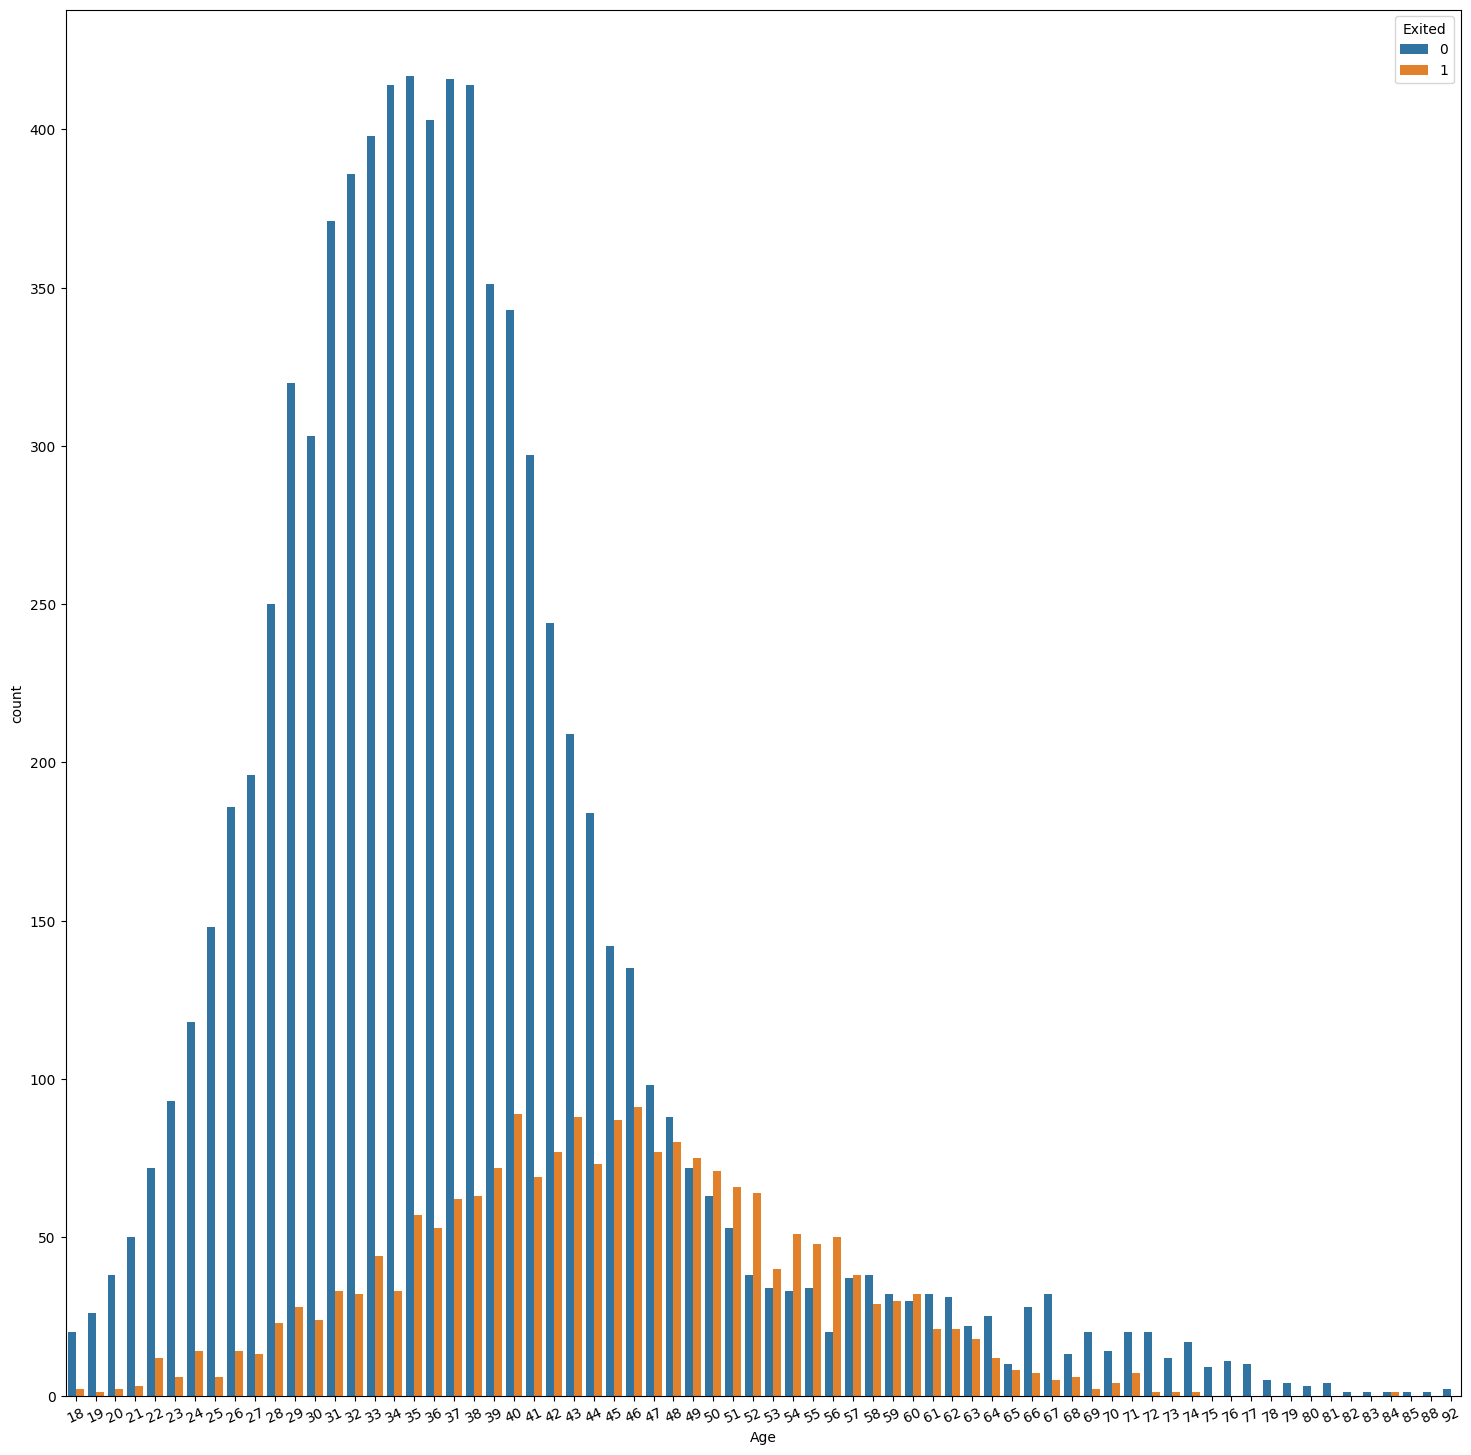

In [17]:
plt.figure(figsize = (18,18))
sns.countplot(x= data['Age'],hue=data['Exited'])
plt.xticks(rotation = 25)
plt.show()

#### Observations
1. Age of customers range between 18 and 92 with customers in between 21 to 52 age are high in number compared to other age groups. 
2. We see a shift in the pattern of Exiting the bank i.e Younger Generation i.e from 18 to 42 rather tend to not exit the bank and people ageing between 40 to 57 tend to show high rate of exiting the bank in compare to all other age groups of people.
3. People Ageing betweeen 49 to 57 exited the bank even more than who are not exiting the bank at the Age interval.

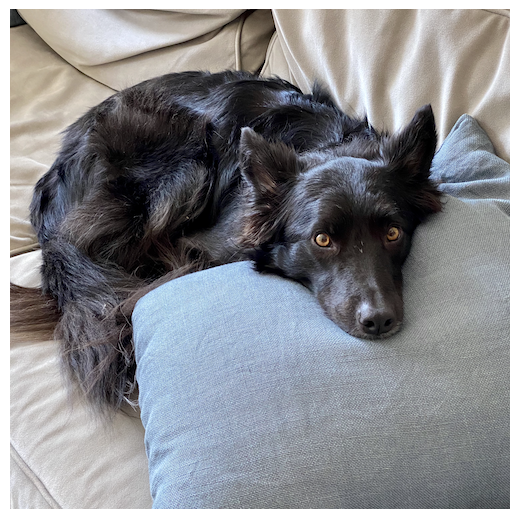

In [18]:
sns.dogplot(48)

#### Observations
1. Found out an Easter Egg while exploring Seaborn so thought of sharing it 😊.

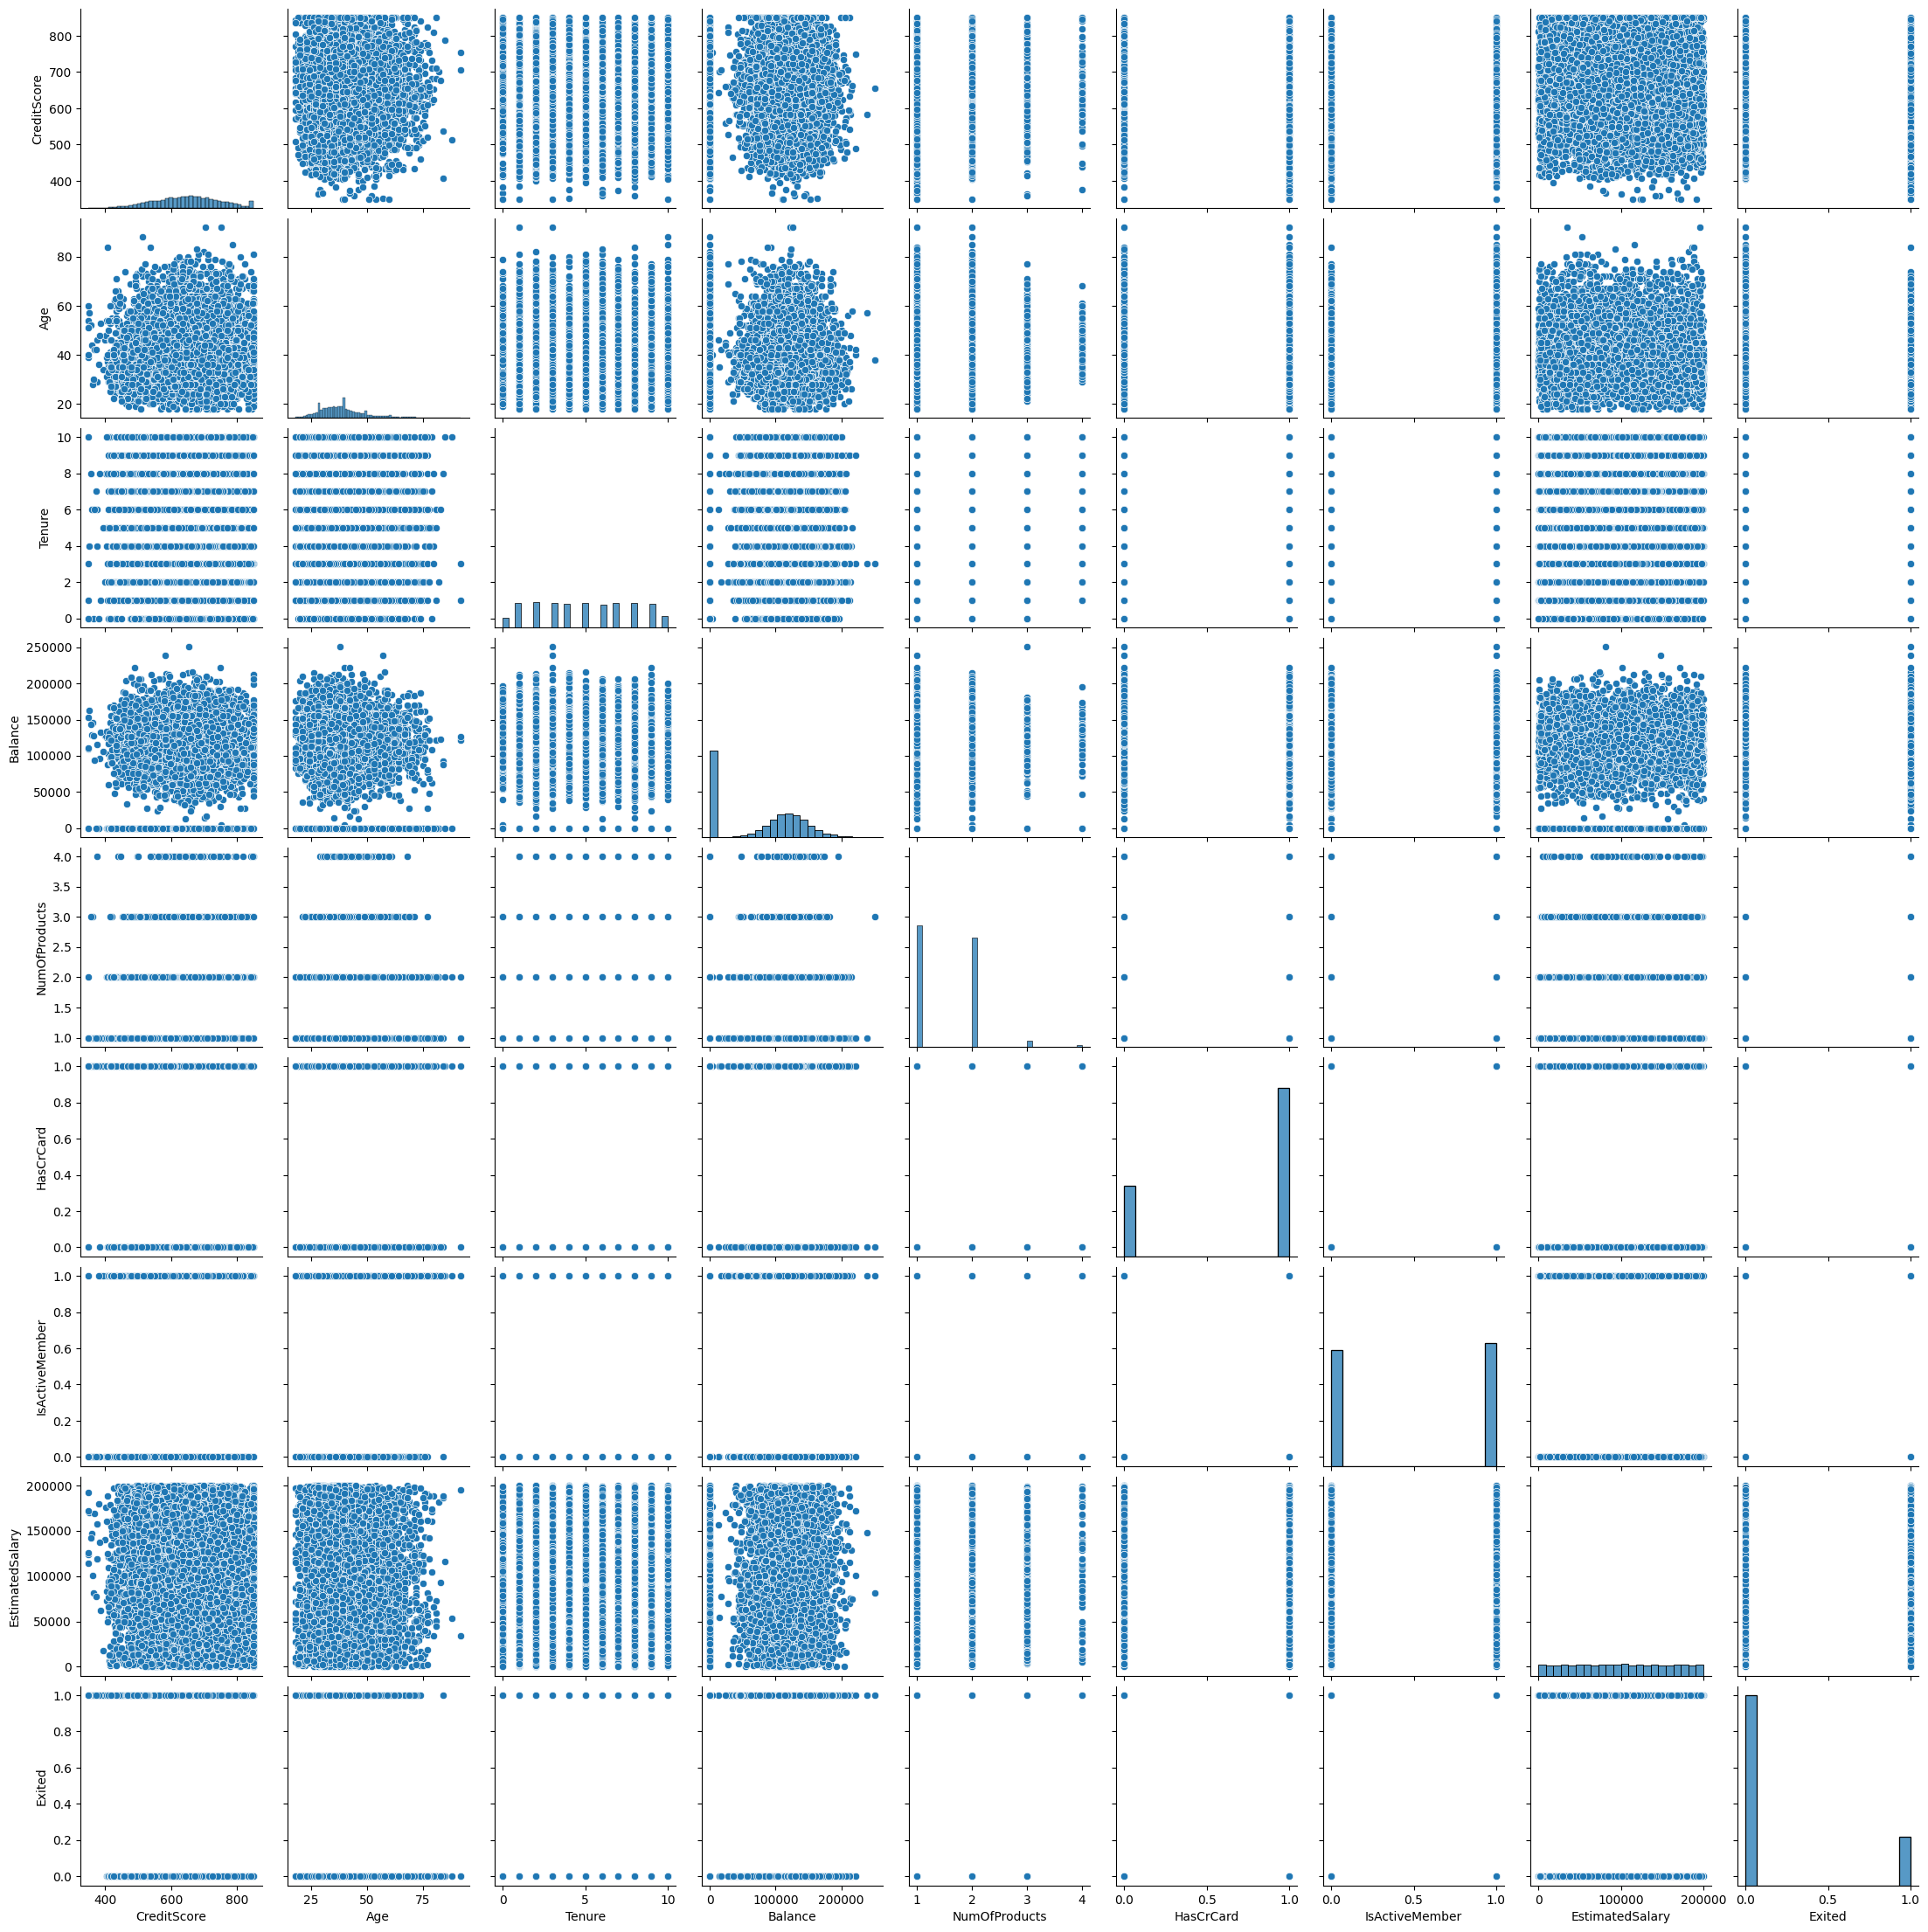

In [19]:
sns.pairplot(data)

<Axes: xlabel='Balance', ylabel='Density'>

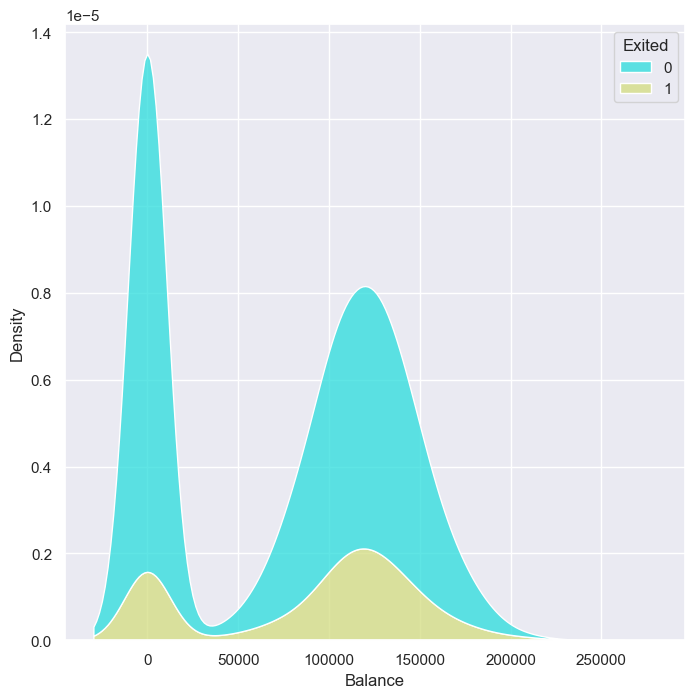

In [126]:
sns.set_theme(style='darkgrid',rc={"figure.figsize": [8, 8]})
sns.kdeplot(x=data['Balance'],hue = data['Exited'],multiple='stack',palette='rainbow')

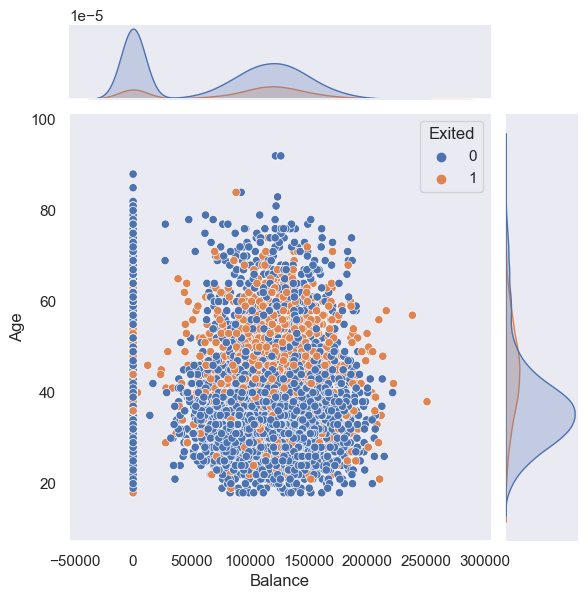

In [21]:
sns.jointplot(x=data['Balance'],y=data['Age'],hue = data['Exited'])

#### Observations
1. Customers having 'Balance' equal to 0 and between 100000 to 150000 have the highest number of customers exiting and not exiting from bank.
2. Mostly customers having 'Balance' equal to 0 are not exiting and customers greater than in age of 40 tend to leave more compared to younger age group people. 

<center><a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a></center> 

### Remaining Predictors

<Axes: xlabel='Tenure', ylabel='Geography'>

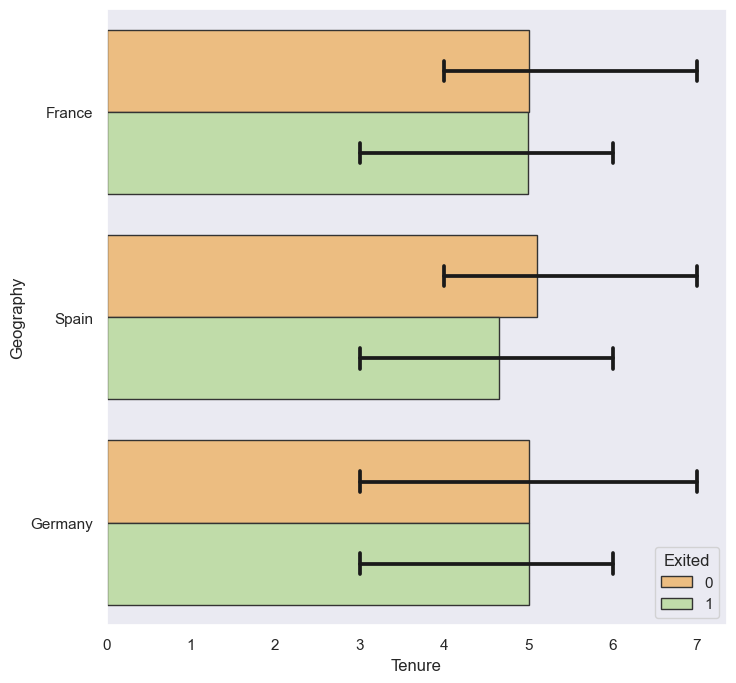

In [22]:
sns.barplot(x=data['Tenure'],y=data['Geography'],hue = data['Exited'], palette= 'Spectral',
           linewidth=1, edgecolor=".2", #facecolor=(0, 0, 0, 0),
           capsize=.1, errcolor=".1",errorbar=("pi", 30))

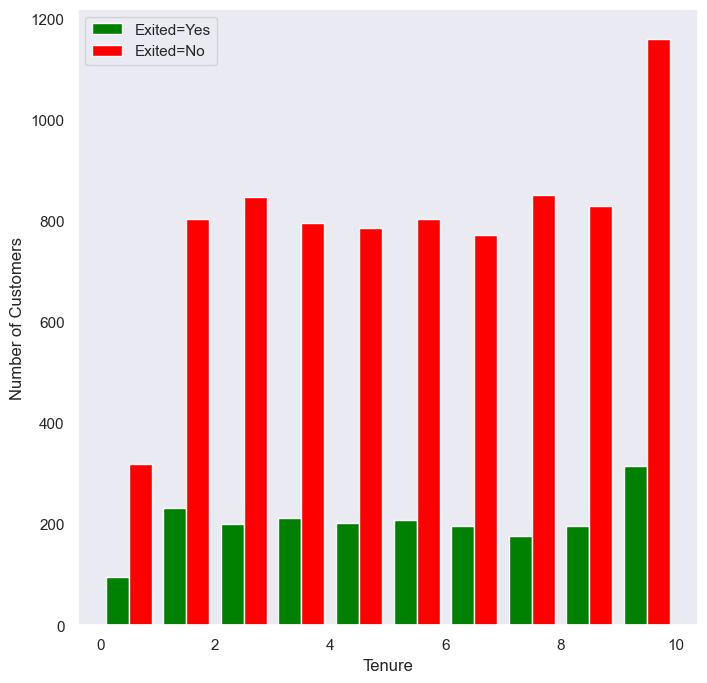

In [23]:
plt.hist([data[data['Exited'] == 1]['Tenure'],data[data['Exited'] == 0]['Tenure']],color=['green','red'],label = ['Exited=Yes','Exited=No'])
plt.legend()
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.show()

### Target Variable

In [24]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

#### Observations after EDA
1. France and Spain region data have more error count as compared to Germany region.
2. Customers having highest Number of Years in the Bank is 10 years and very few have exited which is a positive note for bank's public image around its customers.
3. It is evitable from Target Variable's distribution that the class is imbalanced, we need to take care of at Model Building stage. 
4. Im Data Transformation stage we would get dummies for 4 variables, and scale the rest of the features for final step of model building.

<center><a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a></center> 

<a id = "5"></a>

# Feature Engineering and Feature Transformation

In [25]:
for columns in data:
    print(f'{columns} : {data[columns].unique()}')

CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 

In [26]:
def feature_transform(data):
    
    new_data = data.copy()
    new_data = new_data.replace({'Female': 1, 'Male': 0})

    categorical = ['Geography','Tenure','NumOfProducts']
    ohe = OneHotEncoder(drop='first',sparse=False)
    ohe.fit(new_data[categorical])

    transformed_data = pd.DataFrame(ohe.transform(new_data[categorical]), columns=ohe.get_feature_names_out())
    new_data = pd.concat([new_data,transformed_data],axis = 1)
    
    to_scale = ['CreditScore','Age','Balance','EstimatedSalary']
    scaler = MinMaxScaler()
    
    new_data[to_scale] = scaler.fit_transform(new_data[to_scale])
    
    new_data = new_data.drop(['Geography','Tenure','NumOfProducts'], axis = 1)
    
    new_data = new_data.astype('float')
    
    return new_data
    
data = feature_transform(data)

In [27]:
data

,CreditScore,Gender,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,...,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,0.538,1.0,0.324324,0.000000,1.0,1.0,0.506735,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.516,1.0,0.310811,0.334031,0.0,1.0,0.562709,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.304,1.0,0.324324,0.636357,1.0,0.0,0.569654,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.698,1.0,0.283784,0.000000,0.0,0.0,0.469120,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.000,1.0,0.337838,0.500246,1.0,1.0,0.395400,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.0,0.283784,0.000000,1.0,0.0,0.481341,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9996,0.332,0.0,0.229730,0.228657,1.0,1.0,0.508490,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9997,0.718,1.0,0.243243,0.000000,0.0,1.0,0.210390,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.844,0.0,0.324324,0.299226,1.0,0.0,0.464429,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [28]:
for columns in data:
    print(f'{columns} : {data[columns].unique()}')

CreditScore : [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.

<center><a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a></center> 

<a id = "6"></a>
# Correlation Matrix

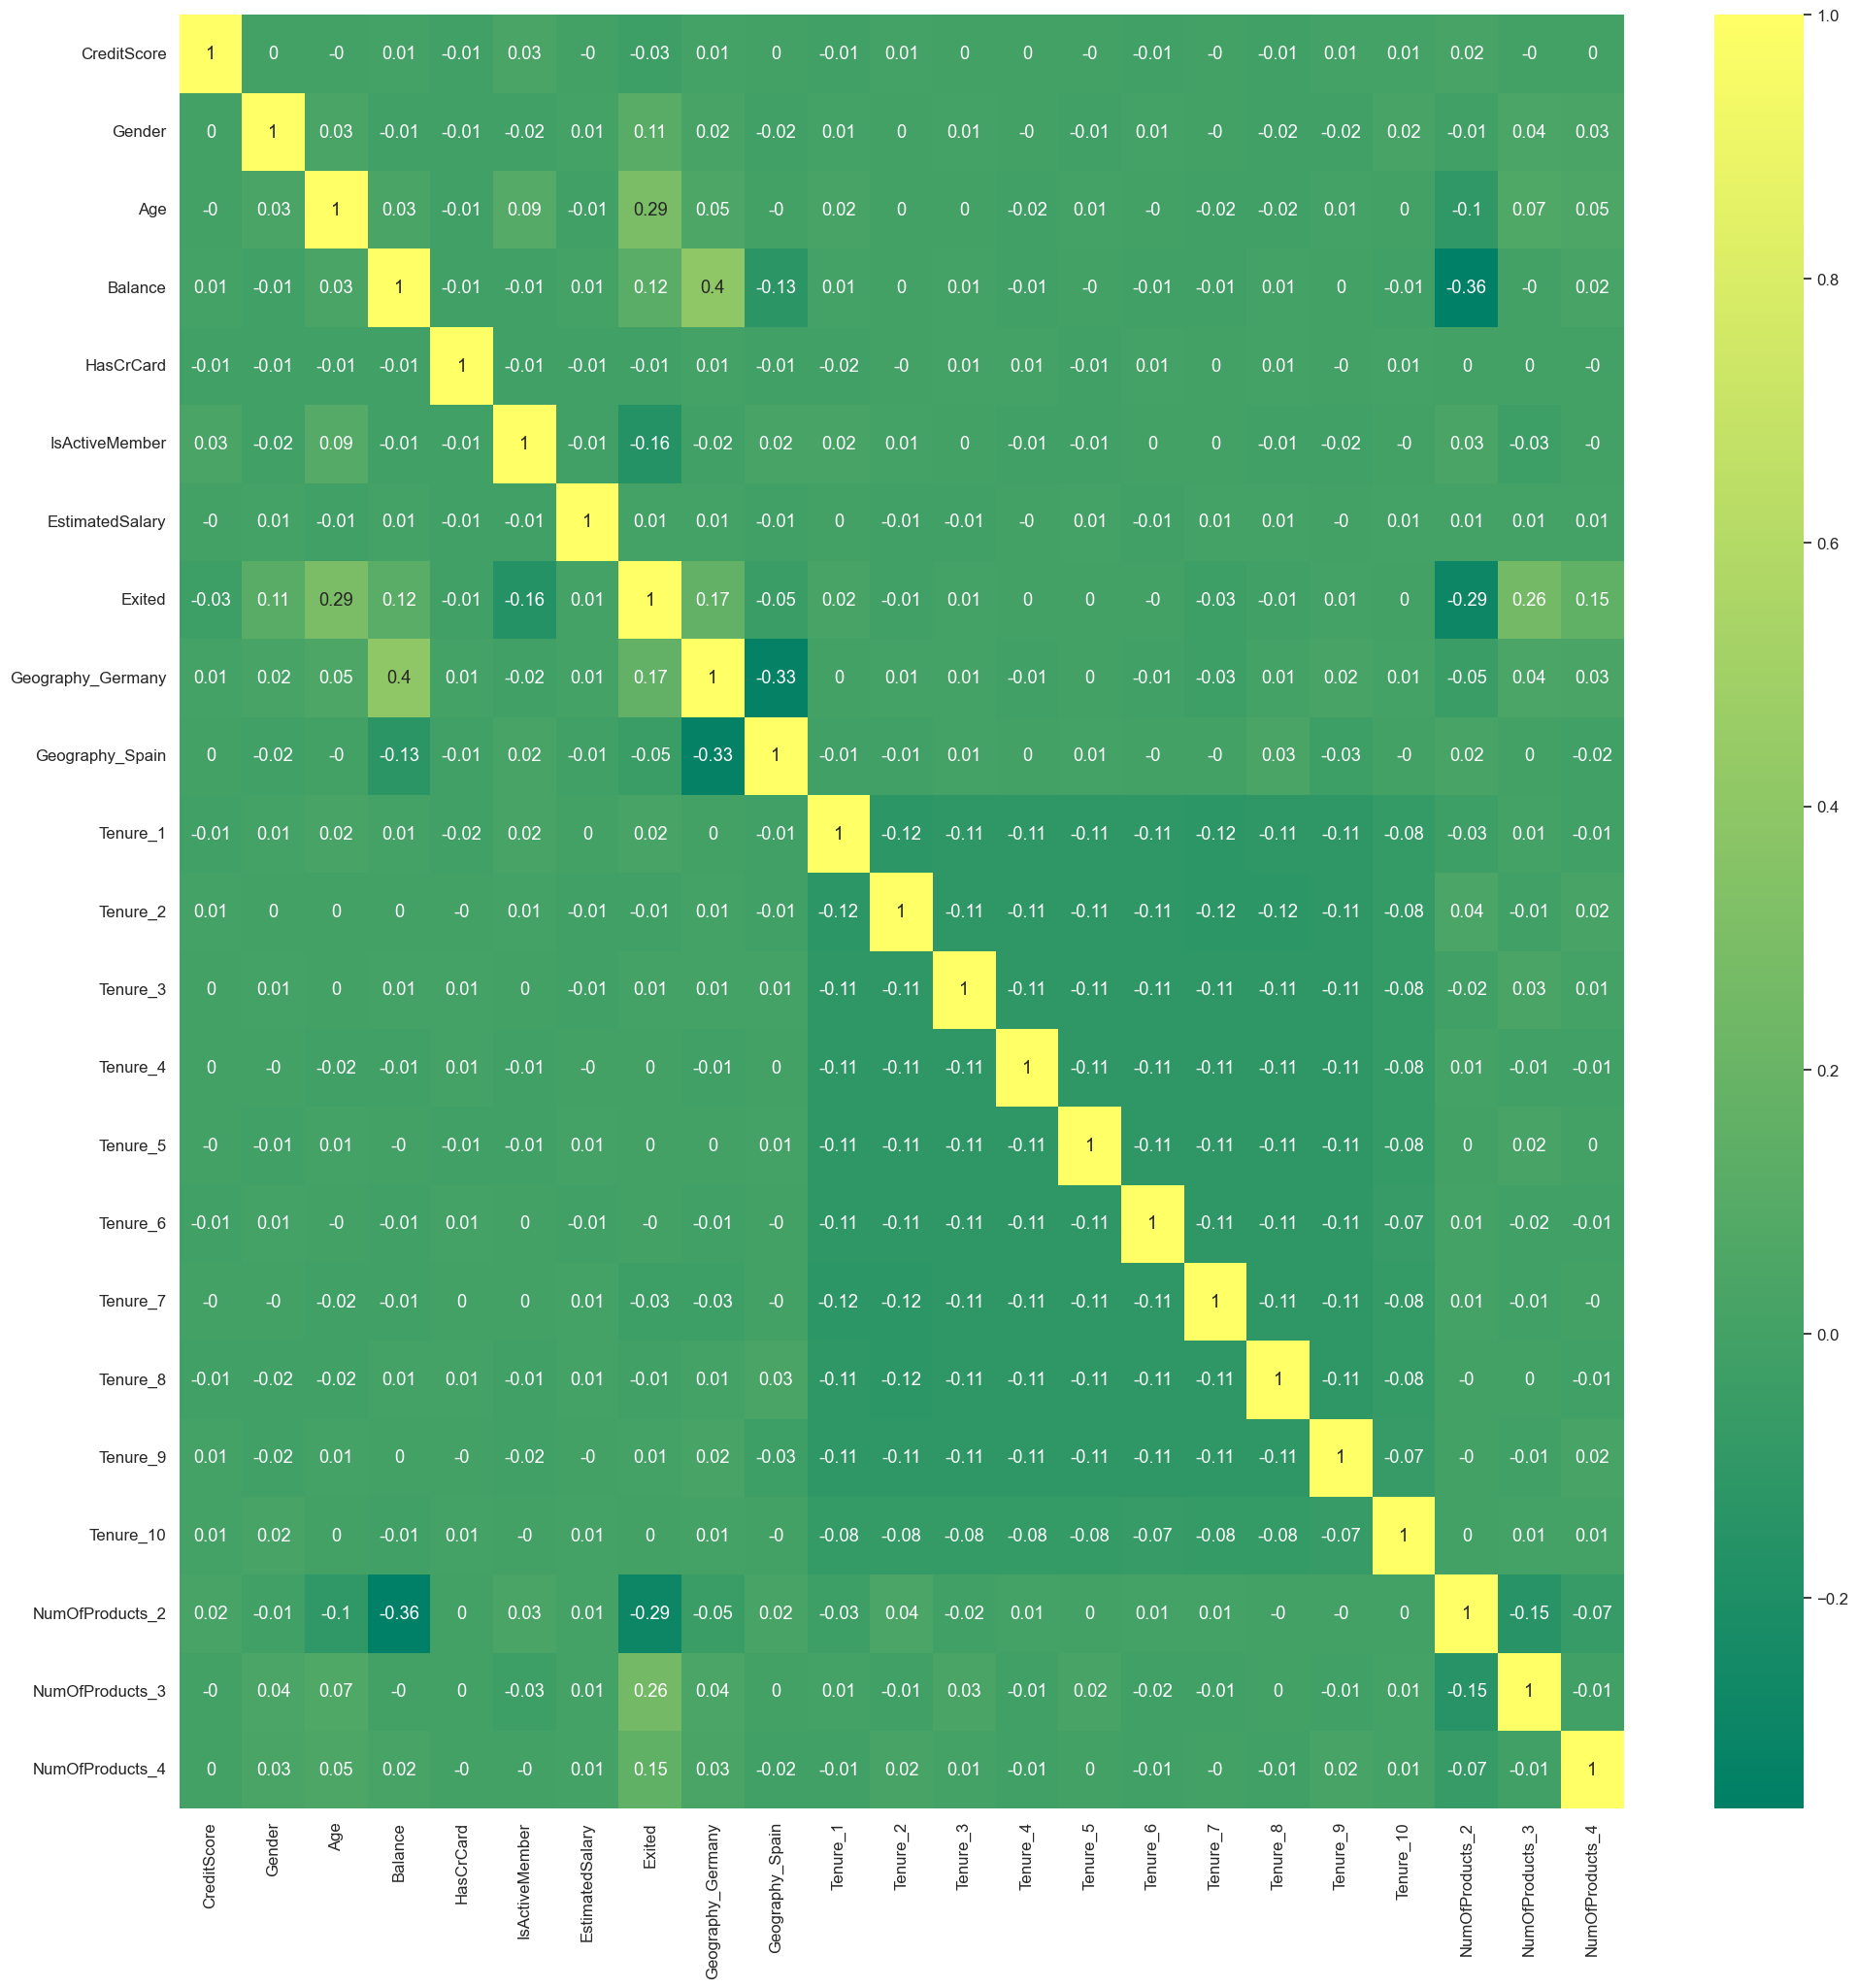

In [29]:
sns.set(font_scale=1.1,rc={"figure.figsize": [24, 24]})
sns.heatmap(data.corr().round(2),annot=True,cmap = 'summer');

#### Observations
1. There are no 2 or more predictors highly correlated to each other so we move forward to model building step.

<center><a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a></center> 

<a id="7"></a>

# Hyperparameter Tuning and Adjusting Imbalance in Dataset

In [ ]:
X = data.drop('Exited',axis = 1)
y = data['Exited']

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.31,stratify=y)

In [154]:
print(X_train.shape)
print(X_test.shape)

(6900, 22)
(3100, 22)


<a id = "7.1"></a>
## Model Building Approach with Random Hyperparameters without sampling

In [ ]:
with tf.device('CPU:0'):
    model = keras.Sequential([
        keras.layers.Dense(18,input_shape=(22,),activation = 'relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(12,activation = 'relu'),
        keras.layers.Dropout(0.4),
        keras.layers.Dense(6,activation = 'relu'),
        keras.layers.Dropout(0.4),
        keras.layers.Dense(1,activation = 'sigmoid')
    ])

    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

    model.fit(X_train,y_train, epochs = 50, batch_size = 15)

In [34]:
model.evaluate(X_test,y_test)

97/97 [==============================] - 0s 2ms/step - loss: 0.3615 - accuracy: 0.8555


[0.36153513193130493, 0.855483889579773]

In [35]:
y_pred = []
for element in model.predict(X_test):
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

print(classification_report(y_test,y_pred))

97/97 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.91      2469
         1.0       0.77      0.42      0.54       631

    accuracy                           0.86      3100
   macro avg       0.82      0.69      0.73      3100
weighted avg       0.85      0.86      0.84      3100



In [ ]:
y_train.value_counts()

#### Observations
1. We used Random Approach without sampling the data as we can see the data label is imbalance in it and we print out the classification report for further examining.
2. In next step we would use Oversampling technique known as SMOTE and then we would compare results of random model to the model developed after proper Hyperparameter Tuning and Sampling.

<center><a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a></center> 

<a id="7.2"></a>
## Using SMOTE for Oversampling the minority class and comparing Precision, Recall and F1 Score before sampling and after sampling

In [37]:
smote = SMOTE(sampling_strategy='minority')
X_train_sm, y_train_sm = smote.fit_resample(X_train,y_train)

In [38]:
y_train_sm.value_counts()

0.0    5494
1.0    5494
Name: Exited, dtype: int64

<center><a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a></center> 

<a id = "7.3"></a>
## HPT using KerasTuner after sampling

In [64]:
from numpy.random import seed
seed(1)
tf.random.set_seed(1)

def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(22,)))
    for i in range(hp.Int('num_layers', 2, 6)):
        model.add(keras.layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=4,
                                            max_value=20,
                                            step=1),
                               activation='relu'))
        model.add(keras.layers.Dropout(hp.Float("dropout_" + str(i), 0, 0.4, step=0.1)))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model


tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='project',
    overwrite=True,
    project_name='Bank Customer Churn')

Trial 5 Complete [00h 00m 53s]
val_accuracy: 0.8350537816683451

Best val_accuracy So Far: 0.852150559425354
Total elapsed time: 00h 03m 49s
INFO:tensorflow:Oracle triggered exit
INFO:tensorflow:Oracle triggered exit
INFO:tensorflow:Oracle triggered exit
INFO:tensorflow:Oracle triggered exit


In [57]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

tuner.search(X_train, y_train,
              epochs=30,batch_size = i,
             validation_data=(X_test, y_test),callbacks=[stop_early])

Trial 5 Complete [00h 00m 17s]
val_accuracy: 0.7964516282081604

Best val_accuracy So Far: 0.8556989431381226
Total elapsed time: 00h 01m 55s
INFO:tensorflow:Oracle triggered exit
INFO:tensorflow:Oracle triggered exit
INFO:tensorflow:Oracle triggered exit
INFO:tensorflow:Oracle triggered exit


In [65]:
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

In [66]:
tuner.results_summary()

Results summary
Results in project\Bank Customer Churn
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 6
units_0: 7
dropout_0: 0.30000000000000004
units_1: 17
dropout_1: 0.0
learning_rate: 0.01
units_2: 4
dropout_2: 0.0
units_3: 4
dropout_3: 0.0
units_4: 4
dropout_4: 0.0
units_5: 4
dropout_5: 0.0
Score: 0.852150559425354
Trial summary
Hyperparameters:
num_layers: 2
units_0: 9
dropout_0: 0.1
units_1: 6
dropout_1: 0.1
learning_rate: 0.001
units_2: 19
dropout_2: 0.30000000000000004
units_3: 12
dropout_3: 0.1
units_4: 11
dropout_4: 0.30000000000000004
units_5: 5
dropout_5: 0.0
Score: 0.8511828184127808
Trial summary
Hyperparameters:
num_layers: 4
units_0: 15
dropout_0: 0.2
units_1: 4
dropout_1: 0.2
learning_rate: 0.01
units_2: 14
dropout_2: 0.2
units_3: 4
dropout_3: 0.30000000000000004
units_4: 19
dropout_4: 0.30000000000000004
units_5: 6
dropout_5: 0.0
Score: 0.8361290494600931
Trial summary
Hyperparameters:
num_layers: 2
units_0: 16
dropout_0: 0.2
units_1: 4
dropout_1: 

In [45]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(best_hps.get('learning_rate'))

16
0.001


#### Observations
1. Done 'SMOTE' sampling and using 'KerasTuner' we tune the hyperparameters of our Artificial Neural Network to get best parameters.

<center><a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a></center> 

<a id = "8"></a>
# Final Model Building

In [74]:
seed(10)
tf.random.set_seed(10)
with tf.device('CPU:0'):
    new_model = keras.Sequential([
        keras.layers.Dense(16,input_shape=(22,),activation = 'relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(9,activation = 'relu'),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(4,activation = 'relu'),
        keras.layers.Dense(1,activation = 'sigmoid')
    ])
    
    new_model.compile(optimizer = tf.optimizers.Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    new_model.fit(X_train_sm,y_train_sm, epochs = 30, batch_size = 25)
    print()
    print("*"*90)
    print()
    new_model.evaluate(X_test,y_test)

Epoch 1/30
440/440 [==============================] - 2s 2ms/step - loss: 0.6351 - accuracy: 0.6245
Epoch 2/30
440/440 [==============================] - 1s 3ms/step - loss: 0.5523 - accuracy: 0.7234
Epoch 3/30
440/440 [==============================] - 2s 4ms/step - loss: 0.5301 - accuracy: 0.7390
Epoch 4/30
440/440 [==============================] - 2s 4ms/step - loss: 0.5123 - accuracy: 0.7525
Epoch 5/30
440/440 [==============================] - 2s 4ms/step - loss: 0.4995 - accuracy: 0.7590
Epoch 6/30
440/440 [==============================] - 1s 2ms/step - loss: 0.4907 - accuracy: 0.7698
Epoch 7/30
440/440 [==============================] - 1s 2ms/step - loss: 0.4824 - accuracy: 0.7732
Epoch 8/30
440/440 [==============================] - 1s 2ms/step - loss: 0.4739 - accuracy: 0.7775
Epoch 9/30
440/440 [==============================] - 1s 2ms/step - loss: 0.4704 - accuracy: 0.7789
Epoch 10/30
440/440 [==============================] - 1s 2ms/step - loss: 0.4651 - accuracy: 0.7832

In [103]:
y_pred_final = []
for element in new_model.predict(X_test):
    if element > 0.5:
        y_pred_final.append(1)
    else:
        y_pred_final.append(0)

print(classification_report(y_test,y_pred_final))

97/97 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

         0.0       0.92      0.79      0.85      2469
         1.0       0.48      0.74      0.58       631

    accuracy                           0.78      3100
   macro avg       0.70      0.77      0.72      3100
weighted avg       0.83      0.78      0.80      3100



<center><a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a></center> 

<a id = "9"></a>
# Results Analyzation using ROC Curves

97/97 [==============================] - 0s 1ms/step
No Skill: ROC AUC=0.500
ANN without Sampling: ROC AUC=0.843
ANN with Proper Sampling: ROC AUC=0.850


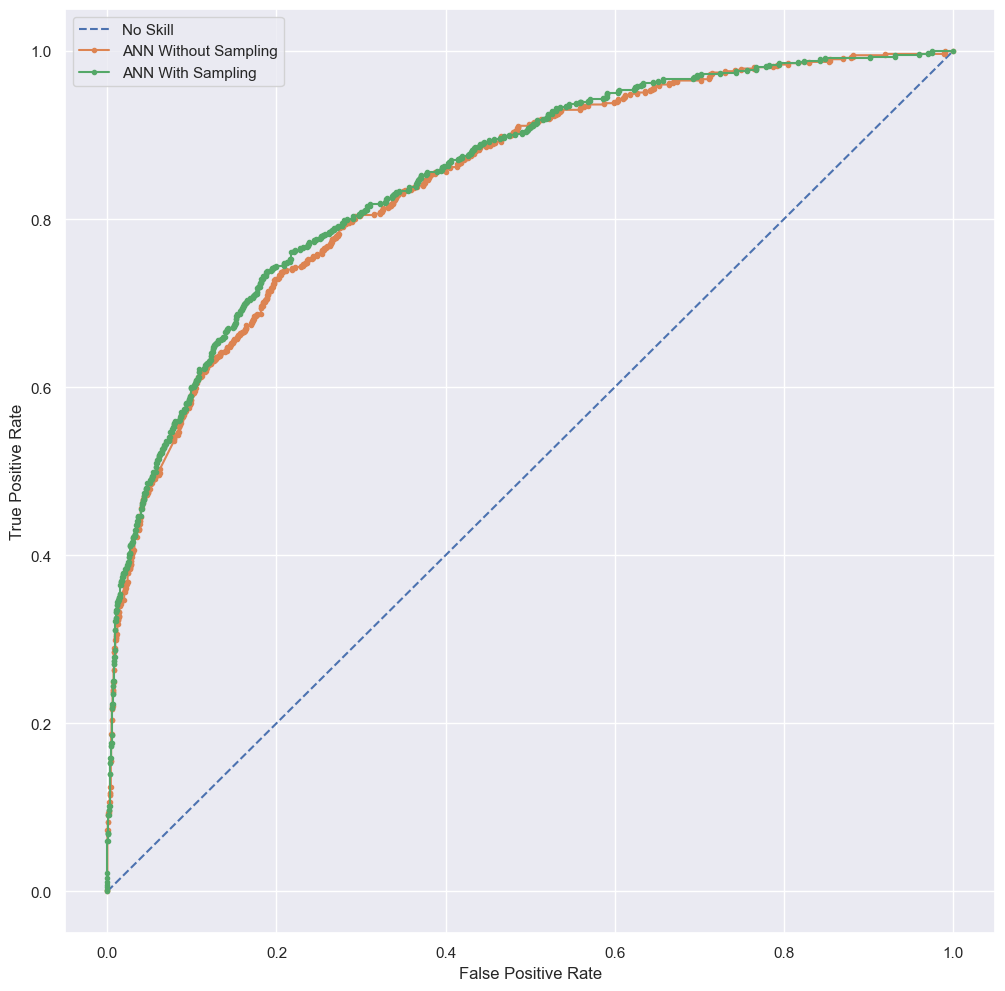

In [153]:
plt.figure(figsize = (10,10))

noskill_proba = [0 for _ in range(len(y_test))]

# keep probabilities for the positive outcome only
ann_proba_without_sampling = [i[0] for i in model.predict(X_test)]
ann_proba_after_sampling = [i[0] for i in new_model.predict(X_test)]

# calculate scores
noskill_auc = roc_auc_score(y_test, noskill_proba)
ann_without_sampl_auc = roc_auc_score(y_test,ann_proba_without_sampling)
ann_withsampl_auc = roc_auc_score(y_test, ann_proba_after_sampling)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (noskill_auc))
print('ANN without Sampling: ROC AUC=%.3f' % (ann_without_sampl_auc))
print('ANN with Proper Sampling: ROC AUC=%.3f' % (ann_withsampl_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, noskill_proba)
ann_withoutsample_fpr, ann_withoutsample_tpr, _ = roc_curve(y_test, ann_proba_without_sampling)
ann_withsample_fpr, ann_withsample_tpr, _ = roc_curve(y_test, ann_proba_after_sampling)


# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(ann_withoutsample_fpr, ann_withoutsample_tpr, marker='.', label='ANN Without Sampling')
plt.plot(ann_withsample_fpr, ann_withsample_tpr, marker='.', label='ANN With Sampling')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

#### Observations
1. It is evident from ROC Curves that the results after SMOTE sampling are more stable and properly support the minority class in testing data.

## If you appreciate my work please feel free to upvote ⬆️
## If any suggestions or questions please post in the comment section will discuss them in detail.
## Follow me on Kaggle and Github 😊

<center><a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a></center> 